# Transferencia de estilo

Tranferencia de estilo utilizando redes neuronales

### Importar y configurar módulos


In [65]:
import tensorflow as tf
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [66]:
estilos = [
    'https://raw.githubusercontent.com/casanovajose/ds-ml-assets/master/kandinsky.jpg',
    'https://raw.githubusercontent.com/casanovajose/ds-ml-assets/master/rocambole.jpg'
]

imagenes = [
    'https://facttic.org.ar/wp-content/uploads/2019/07/foto_grupal_nayra_HD-768x521.jpg',
    'https://raw.githubusercontent.com/casanovajose/ds-ml-assets/master/viale_samid.jpg'    
]

content_path = tf.keras.utils.get_file('vs.jpg', imagenes[1])

style_path = tf.keras.utils.get_file("estilo1.jpg", estilos[0])
style_nayra_path = tf.keras.utils.get_file("estilo.jpg", estilos[1])

## Visualizar los inputs

funciones para operar y visualizar las imágenes

In [67]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

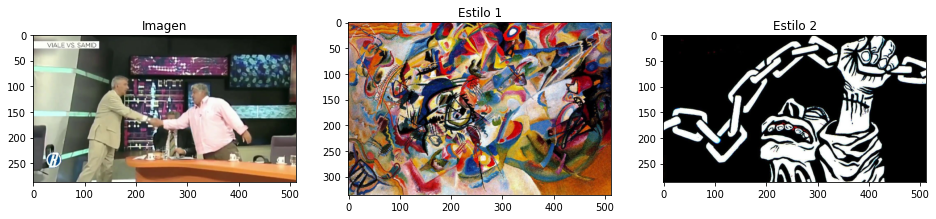

In [68]:
content_image = load_img(content_path)
style_image = load_img(style_path)
style_nayra = load_img(style_nayra_path)

plt.subplot(1, 3, 1)
imshow(content_image, 'Imagen')

plt.subplot(1, 3, 2)
imshow(style_image, 'Estilo 1')

plt.subplot(1, 3, 3)
imshow(style_nayra, 'Estilo 2')


## Transferir estilos



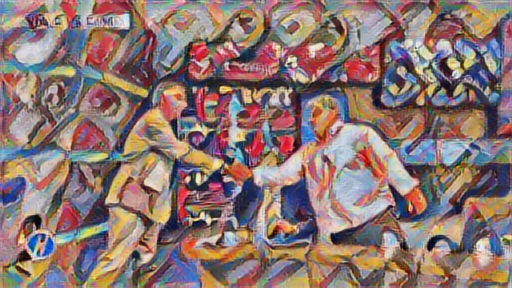

In [69]:
# Estilo 1
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

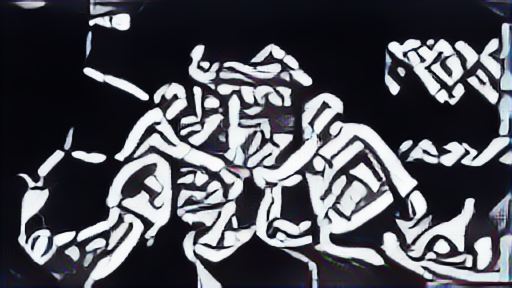

In [70]:
# Estilo 2
stylized_image_nayra = hub_module(tf.constant(content_image), tf.constant(style_nayra))[0]
tensor_to_image(stylized_image_nayra)